# Twitter API

##### Twitter streaming API

To track conversations on real time. Either by keyword or coordinates.

In [ ]:
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import json

#Variables that contains the user credentials to access Twitter API 
access_token = "2985516418-SUq5H3YcMHnuxOUMcOff1JzqcawmWe32yJ62R3b"
access_token_secret = "1emNMPsgiMlXfv3kfdGZedujQM7A9S0PGIybPWIBlCp88"
consumer_key = "FNyqehErXjBIIlIURl0pIFdAN"
consumer_secret = "hF24gMFPZDL7EoDLIorCVLVDSDhGjf1ZyGXVxc1mhEjklys1sP"

D=[]
#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        D.append(data)
        #print data
        with open("Tweets_json_Col", "a") as outfile:
         #   data=data
          #  io = ''
            #data=json.loads(data)

            json.dump(data,outfile)
            outfile.write('\n')
            print data

        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = tweepy.Stream(auth, l)
    #stream = Stream(auth,l)

    #This line filter Twitter Streams to capture data by the keywords: '24m', 'elecciones'
    stream.filter(track=['columbia university'])

View a single tweet

In [8]:
a=json.loads(D[5])
print a

{u'contributors': None, u'truncated': False, u'text': u'See a virtual tour of one of our newest listings 190 BIG GAME LOOP Columbia, SC listed by Danny Glenn. http://t.co/lZTRPPlTxW', u'in_reply_to_status_id': None, u'id': 614384096492560384, u'favorite_count': 0, u'source': u'<a href="http://www.facebook.com/twitter" rel="nofollow">Facebook</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1435315557965', u'entities': {u'user_mentions': [], u'symbols': [], u'trends': [], u'hashtags': [], u'urls': [{u'url': u'http://t.co/lZTRPPlTxW', u'indices': [103, 125], u'expanded_url': u'http://fb.me/4i13vwyFO', u'display_url': u'fb.me/4i13vwyFO'}]}, u'in_reply_to_screen_name': None, u'id_str': u'614384096492560384', u'retweet_count': 0, u'in_reply_to_user_id': None, u'favorited': False, u'user': {u'follow_request_sent': None, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 494394243, u'verified': False, u'profile_image_url_https': u'https://pbs.twi

Now lets explore the structure of the tweet. What info does it provide?

In [9]:
print a.keys()
print a['text']


[u'contributors', u'truncated', u'text', u'in_reply_to_status_id', u'id', u'favorite_count', u'source', u'retweeted', u'coordinates', u'timestamp_ms', u'entities', u'in_reply_to_screen_name', u'id_str', u'retweet_count', u'in_reply_to_user_id', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'possibly_sensitive', u'lang', u'created_at', u'filter_level', u'in_reply_to_status_id_str', u'place']
See a virtual tour of one of our newest listings 190 BIG GAME LOOP Columbia, SC listed by Danny Glenn. http://t.co/lZTRPPlTxW


###### Script to import tweets if we have them stored in a file.

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as pl

tweets_data=[]
with open('Tweets_json_24M','r') as lines:
    for line in lines:
        try:
            tweet = json.loads(eval(line))
            tweets_data.append(tweet)
            #print 'tweet'
        except:
            print 'nop'

In [8]:
tweets_data[1]

{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Thu May 21 17:05:14 +0000 2015',
 u'entities': {u'hashtags': [],
  u'symbols': [],
  u'trends': [],
  u'urls': [{u'display_url': u'facebook.com/estrella.vidal\u2026',
    u'expanded_url': u'https://www.facebook.com/estrella.vidalluna/videos/634854746645507/?fref=nf',
    u'indices': [42, 65],
    u'url': u'https://t.co/tOjFieCmiW'}],
  u'user_mentions': [{u'id': 266641960,
    u'id_str': u'266641960',
    u'indices': [0, 15],
    u'name': u'Cristina Pardo',
    u'screen_name': u'cristina_pardo'},
   {u'id': 20509689,
    u'id_str': u'20509689',
    u'indices': [69, 78],
    u'name': u'Partido Popular',
    u'screen_name': u'PPopular'}]},
 u'favorite_count': 0,
 u'favorited': False,
 u'filter_level': u'low',
 u'geo': None,
 u'id': 601433579957133312L,
 u'id_str': u'601433579957133312',
 u'in_reply_to_screen_name': u'cristina_pardo',
 u'in_reply_to_status_id': 601433123293949952L,
 u'in_reply_to_status_id_str': u'6014331232

###### Script to import tweets if we have them stored in a file.

In [126]:
import json
import pandas as pd
import matplotlib.pyplot as pl

tweets_data=[]

for line in D:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        print 'Fail!'

In [165]:
tweets_data[1].keys()
tweets_data[1].values()
#tweets_data[1]['']
for i in tweets_data[1].keys():
    print i,'/',type(tweets_data[1][i])

contributors / <type 'NoneType'>
truncated / <type 'bool'>
text / <type 'unicode'>
in_reply_to_status_id / <type 'NoneType'>
id / <type 'long'>
favorite_count / <type 'int'>
source / <type 'unicode'>
retweeted / <type 'bool'>
coordinates / <type 'NoneType'>
timestamp_ms / <type 'unicode'>
entities / <type 'dict'>
in_reply_to_screen_name / <type 'NoneType'>
id_str / <type 'unicode'>
retweet_count / <type 'int'>
in_reply_to_user_id / <type 'NoneType'>
favorited / <type 'bool'>
retweeted_status / <type 'dict'>
user / <type 'dict'>
geo / <type 'NoneType'>
in_reply_to_user_id_str / <type 'NoneType'>
possibly_sensitive / <type 'bool'>
lang / <type 'unicode'>
created_at / <type 'unicode'>
filter_level / <type 'unicode'>
in_reply_to_status_id_str / <type 'NoneType'>
place / <type 'NoneType'>
extended_entities / <type 'dict'>


##### Structuring the tweets in a dataframe. Pandas can automatically parse jsons and structure the information into tables

In [166]:
import pandas as pd
tweets = pd.DataFrame(tweets_data)
tweets.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user
0,None,None,Thu May 21 14:50:11 +0000 2015,"{u'user_mentions': [], u'symbols': [], u'trend...",NaN,0,False,low,None,601399595910967298,...,None,False,0,False,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Miembros de la MUD reiteran llamado al CNE par...,1432219811786,False,"{u'follow_request_sent': None, u'profile_use_b..."
1,None,None,Thu May 21 14:50:12 +0000 2015,"{u'symbols': [], u'media': [{u'source_status_i...",{u'media': [{u'source_status_id_str': u'601372...,0,False,low,None,601399597605486592,...,None,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @SocialcumbreS: Pedimos la participación en...,1432219812190,False,"{u'follow_request_sent': None, u'profile_use_b..."
2,None,None,Thu May 21 14:50:12 +0000 2015,"{u'user_mentions': [{u'id': 17214331, u'indice...",NaN,0,False,low,None,601399600965152769,...,None,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @gaceta_es: Susana Díaz podría erigirse com...,1432219812991,False,"{u'follow_request_sent': None, u'profile_use_b..."
3,None,None,Thu May 21 14:50:13 +0000 2015,"{u'user_mentions': [{u'id': 18238467, u'indice...",NaN,0,False,low,None,601399604798746624,...,"{u'country_code': u'ES', u'url': u'https://api...",False,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@EsperanzAguirre está con las víctimas de ETA ...,1432219813905,False,"{u'follow_request_sent': None, u'profile_use_b..."
4,None,None,Thu May 21 14:50:15 +0000 2015,"{u'user_mentions': [{u'id': 197512424, u'indic...",NaN,0,False,low,None,601399610616225793,...,None,False,0,False,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Descarta @iepcjalisco más debates en Guadalaja...,1432219815292,False,"{u'follow_request_sent': None, u'profile_use_b..."


###### Count tweets per lang

In [167]:
langs=tweets.groupby(['lang'])['lang']
langs.count()

lang
cy        1
en        6
es      637
fr       10
it        2
pt        6
ro       10
sk        3
und      16
Name: lang, dtype: int64

###### Function to count length of tweets

In [168]:
 def length(x):
        return len(x['text'])

In [169]:
tweets['len']=tweets.apply(length,axis=1)


In [170]:
max(tweets['len'])

141

Why some tweets contain more than 140 characters?

In [171]:
len('café')

5

In [172]:
###filter long tweets
tweets[(tweets.len < 141) ]
 #& (df.D == 6)]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,filter_level,geo,id,...,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,len
0,None,None,Thu May 21 14:50:11 +0000 2015,"{u'user_mentions': [], u'symbols': [], u'trend...",NaN,0,False,low,None,601399595910967298,...,False,0,False,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Miembros de la MUD reiteran llamado al CNE par...,1432219811786,False,"{u'follow_request_sent': None, u'profile_use_b...",109
1,None,None,Thu May 21 14:50:12 +0000 2015,"{u'symbols': [], u'media': [{u'source_status_i...",{u'media': [{u'source_status_id_str': u'601372...,0,False,low,None,601399597605486592,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @SocialcumbreS: Pedimos la participación en...,1432219812190,False,"{u'follow_request_sent': None, u'profile_use_b...",140
2,None,None,Thu May 21 14:50:12 +0000 2015,"{u'user_mentions': [{u'id': 17214331, u'indice...",NaN,0,False,low,None,601399600965152769,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @gaceta_es: Susana Díaz podría erigirse com...,1432219812991,False,"{u'follow_request_sent': None, u'profile_use_b...",98
3,None,None,Thu May 21 14:50:13 +0000 2015,"{u'user_mentions': [{u'id': 18238467, u'indice...",NaN,0,False,low,None,601399604798746624,...,False,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@EsperanzAguirre está con las víctimas de ETA ...,1432219813905,False,"{u'follow_request_sent': None, u'profile_use_b...",96
4,None,None,Thu May 21 14:50:15 +0000 2015,"{u'user_mentions': [{u'id': 197512424, u'indic...",NaN,0,False,low,None,601399610616225793,...,False,0,False,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",Descarta @iepcjalisco más debates en Guadalaja...,1432219815292,False,"{u'follow_request_sent': None, u'profile_use_b...",83
5,None,None,Thu May 21 14:50:16 +0000 2015,"{u'user_mentions': [{u'id': 371328282, u'indic...",NaN,0,False,low,None,601399616068833280,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/iphone"" r...",RT @SurcanaMadrid: Ya se siente el cambio pero...,1432219816592,False,"{u'follow_request_sent': None, u'profile_use_b...",119
6,None,None,Thu May 21 14:50:16 +0000 2015,"{u'user_mentions': [{u'id': 154985600, u'indic...",NaN,0,False,low,None,601399616949608448,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @peraltuki: Recuerdo a los estudiantes de l...,1432219816802,False,"{u'follow_request_sent': None, u'profile_use_b...",140
7,None,None,Thu May 21 14:50:16 +0000 2015,"{u'symbols': [], u'media': [{u'source_status_i...",{u'media': [{u'source_status_id_str': u'601366...,0,False,low,None,601399616496537601,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""https://twitter.com/download/android""...",RT @paudiazboils: Si vives en Xàtiva el #24M p...,1432219816694,False,"{u'follow_request_sent': None, u'profile_use_b...",140
8,None,None,Thu May 21 14:50:17 +0000 2015,"{u'user_mentions': [{u'id': 3097174113, u'indi...",NaN,0,False,low,None,601399618711199745,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @arcanomg: @mercedesninci1 en las prox elec...,1432219817222,False,"{u'follow_request_sent': None, u'profile_use_b...",140
9,None,None,Thu May 21 14:50:17 +0000 2015,"{u'user_mentions': [{u'id': 155647130, u'indic...",NaN,0,False,low,None,601399621294882817,...,False,0,False,"{u'contributors': None, u'truncated': False, u...","<a href=""http://twitter.com/download/android"" ...",RT @guanocana: Dispersión de votos predomina a...,1432219817838,False,"{u'follow_request_sent': None, u'profil

###### Create Dataframe with selected variables

In [173]:
df2=pd.DataFrame()
df2['text'] = map(lambda x: x['text'], tweets_data)
df2['chars'] = map(lambda x: len(x['text']), tweets_data)
df2['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
df2['RT'] = map(lambda tweet: tweet['retweeted'], tweets_data)
df2['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)
df2['user'] = map(lambda tweet: tweet['user']['id'], tweets_data)
df2['loc_user'] = map(lambda tweet: tweet['user']['time_zone'], tweets_data)

df2

,text,chars,lang,RT,country,user,loc_user
0,Miembros de la MUD reiteran llamado al CNE par...,109,es,False,None,112811044,Caracas
1,RT @SocialcumbreS: Pedimos la participación en...,140,es,False,None,522509627,Madrid
2,RT @gaceta_es: Susana Díaz podría erigirse com...,98,es,False,None,531153629,None
3,@EsperanzAguirre está con las víctimas de ETA ...,96,es,False,España,130674771,None
4,Descarta @iepcjalisco más debates en Guadalaja...,83,es,False,None,2326012921,Mexico City
5,RT @SurcanaMadrid: Ya se siente el cambio pero...,119,es,False,None,389667916,Brussels
6,RT @peraltuki: Recuerdo a los estudiantes de l...,140,es,False,None,533029220,Madrid
7,RT @paudiazboils: Si vives en Xàtiva el #24M p...,140,es,False,None,464089504,None
8,RT @arcanomg: @mercedesninci1 en las prox elec...,140,es,False,None,48325032,Buenos Aires
9,RT @guanocana: Dispersión de votos predomina a...,140,es,False,None,1058104081,Amsterdam


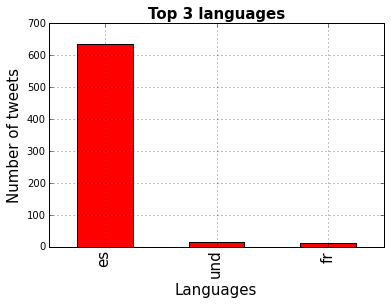

In [174]:
import pandas as pd
import matplotlib.pyplot as pl

tweets_by_lang = df2['lang'].value_counts()


ax = pl.subplot(111)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 3 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:3].plot(ax=ax, kind='bar', color='red')

pl.show()

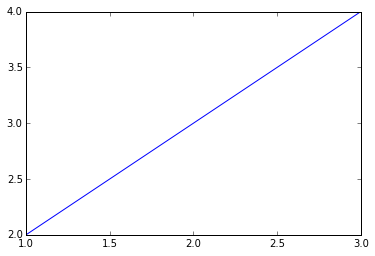

In [175]:
pl.figure(1)
pl.plot([1,2,3],[2,3,4],'-')
pl.show()

In [9]:
###Plot top 3 locations

#### words in text

In [177]:
import re
def word_tw(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

###### Mentions to politicians or political parties??

In [10]:
###check if word in tweet

#tweets_by_party


In [11]:
#Plot number of mentions to each party

In [12]:
#Info about the user
tweets_data[3]['user']
#What user has the maximum number of followers?


{u'contributors_enabled': False,
 u'created_at': u'Wed Feb 29 22:33:00 +0000 2012',
 u'default_profile': False,
 u'default_profile_image': False,
 u'description': u'Amante de las artes marciales, dubstep, trap y de las pelirrojas :$ http://instagram.com/kabuy27',
 u'favourites_count': 425,
 u'follow_request_sent': None,
 u'followers_count': 223,
 u'following': None,
 u'friends_count': 203,
 u'geo_enabled': True,
 u'id': 509348979,
 u'id_str': u'509348979',
 u'is_translator': False,
 u'lang': u'es',
 u'listed_count': 3,
 u'location': u'',
 u'name': u'Wobbuffet',
 u'notifications': None,
 u'profile_background_color': u'131516',
 u'profile_background_image_url': u'http://pbs.twimg.com/profile_background_images/474616163289153537/-Y-LvrL1.jpeg',
 u'profile_background_image_url_https': u'https://pbs.twimg.com/profile_background_images/474616163289153537/-Y-LvrL1.jpeg',
 u'profile_background_tile': True,
 u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/509348979/1400097077',
 

In [181]:
#tweets_data[10]['user']
#df2=df2.drop('text', axis=1)
df2=df2.drop('RT', axis=1)

df2.to_csv('teets_prep.csv', sep='\t', encoding='utf-8',header=False)
df2


,text,chars,lang,country,user,loc_user,podemos,pp,psoe,length
0,Miembros de la MUD reiteran llamado al CNE par...,109,es,None,112811044,Caracas,False,False,False,109
1,RT @SocialcumbreS: Pedimos la participación en...,140,es,None,522509627,Madrid,False,False,False,140
2,RT @gaceta_es: Susana Díaz podría erigirse com...,98,es,None,531153629,None,False,False,True,98
3,@EsperanzAguirre está con las víctimas de ETA ...,96,es,España,130674771,None,False,False,False,96
4,Descarta @iepcjalisco más debates en Guadalaja...,83,es,None,2326012921,Mexico City,False,False,False,83
5,RT @SurcanaMadrid: Ya se siente el cambio pero...,119,es,None,389667916,Brussels,False,False,False,119
6,RT @peraltuki: Recuerdo a los estudiantes de l...,140,es,None,533029220,Madrid,False,False,False,140
7,RT @paudiazboils: Si vives en Xàtiva el #24M p...,140,es,None,464089504,None,False,False,False,140
8,RT @arcanomg: @mercedesninci1 en las prox elec...,140,es,None,48325032,Buenos Aires,False,False,False,140
9,RT @guanocana: Dispersión de votos predomina a...,140,es,None,1058104081,Amsterdam,False,False,False,140


### Build RT Network

In [13]:

import networkx as nx
import json
def RT_graph():
    G=nx.DiGraph()
    
    for line in D:
        tweet = json.loads(line)

        rt_os=get_origin(tweet)
        if not rt_os:
            continue
        for i in rt_os:
            if not G.has_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore')):
                G.add_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore'))
                G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']=1
            else:
                G.add_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore'))
                G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']=G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']+1
    print G
    return G
 

def RT_graph_file():
    G=nx.DiGraph()
    tweets_file = open('./Tweets_json_24M', "r")
    for line in tweets_file:
        tweet = json.loads(eval(line))
        #print (tweet)
        #print type(tweet)
        rt_os=get_origin(tweet)
        if not rt_os:
            continue
        for i in rt_os:
            if not G.has_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore')):
                G.add_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore'))
                G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']=1
            else:
                G.add_edge(i.encode('ascii','ignore'),tweet['user']['screen_name'].encode('ascii','ignore'))
                G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']=G[i.encode('ascii','ignore')][tweet['user']['screen_name'].encode('ascii','ignore')]['weight']+1
    print G
    return G

In [14]:
import re
def get_origin(tweet):
    rt_pat=re.compile(r"(RT|via)((?:\b\w*@\w+)+)",re.IGNORECASE)
    rt_os=[]
    if tweet.has_key('retweeted_status'):
        rt_os+=[tweet['retweeted_status']['user']['screen_name'].lower()]
    try:
        rt_os+=[mention.strip()
                for mention in rt_pat.findall(tweet['text'])[0][1].split()
                ]
    except IndexError,e:
        pass
    return list(set([rto.strip("@").lower() for rto in rt_os]))

In [15]:
G=RT_graph_file()

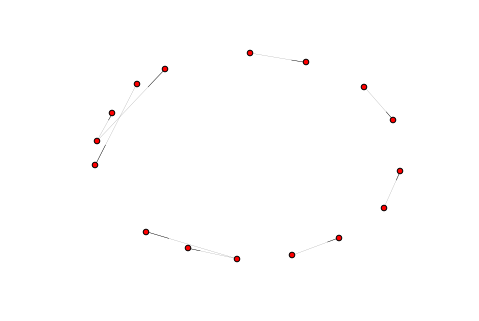

In [16]:
%matplotlib inline 
import networkx as nx

pos=nx.spring_layout(G)
#G=nx.read_gml('24M.gml')
nx.draw(G,pos=pos,node_size=30,width=0.1,linewidth=0) 


('sportiaok', 2)


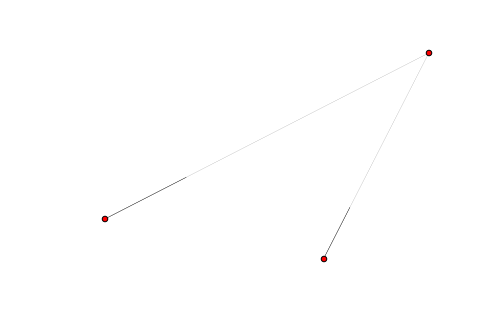

In [17]:
import operator
sorted_users = sorted(G.degree().items(), key=operator.itemgetter(1),reverse=True)

print sorted_users[0]
ego=nx.ego_graph(G,sorted_users[0][0])

nx.draw(ego,pos=nx.spring_layout(ego),node_size=30,width=0.1,linewidth=0) 

In [189]:
nx.write_gml(G,'24M.gml')
G=G.to_undirected()
#print G.edges()
gs = list(nx.connected_component_subgraphs(G))
H=gs[0]

nx.write_gml(H,'24M.gml')